In [ ]:
!nvidia-smi

Mon Apr 17 22:06:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

%cd /content/drive/MyDrive/rvm_object_detection 

/content/drive/MyDrive/rvm_object_detection


In [ ]:
!ls

data.yaml  obj_detection  runs	yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=340 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=340, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=

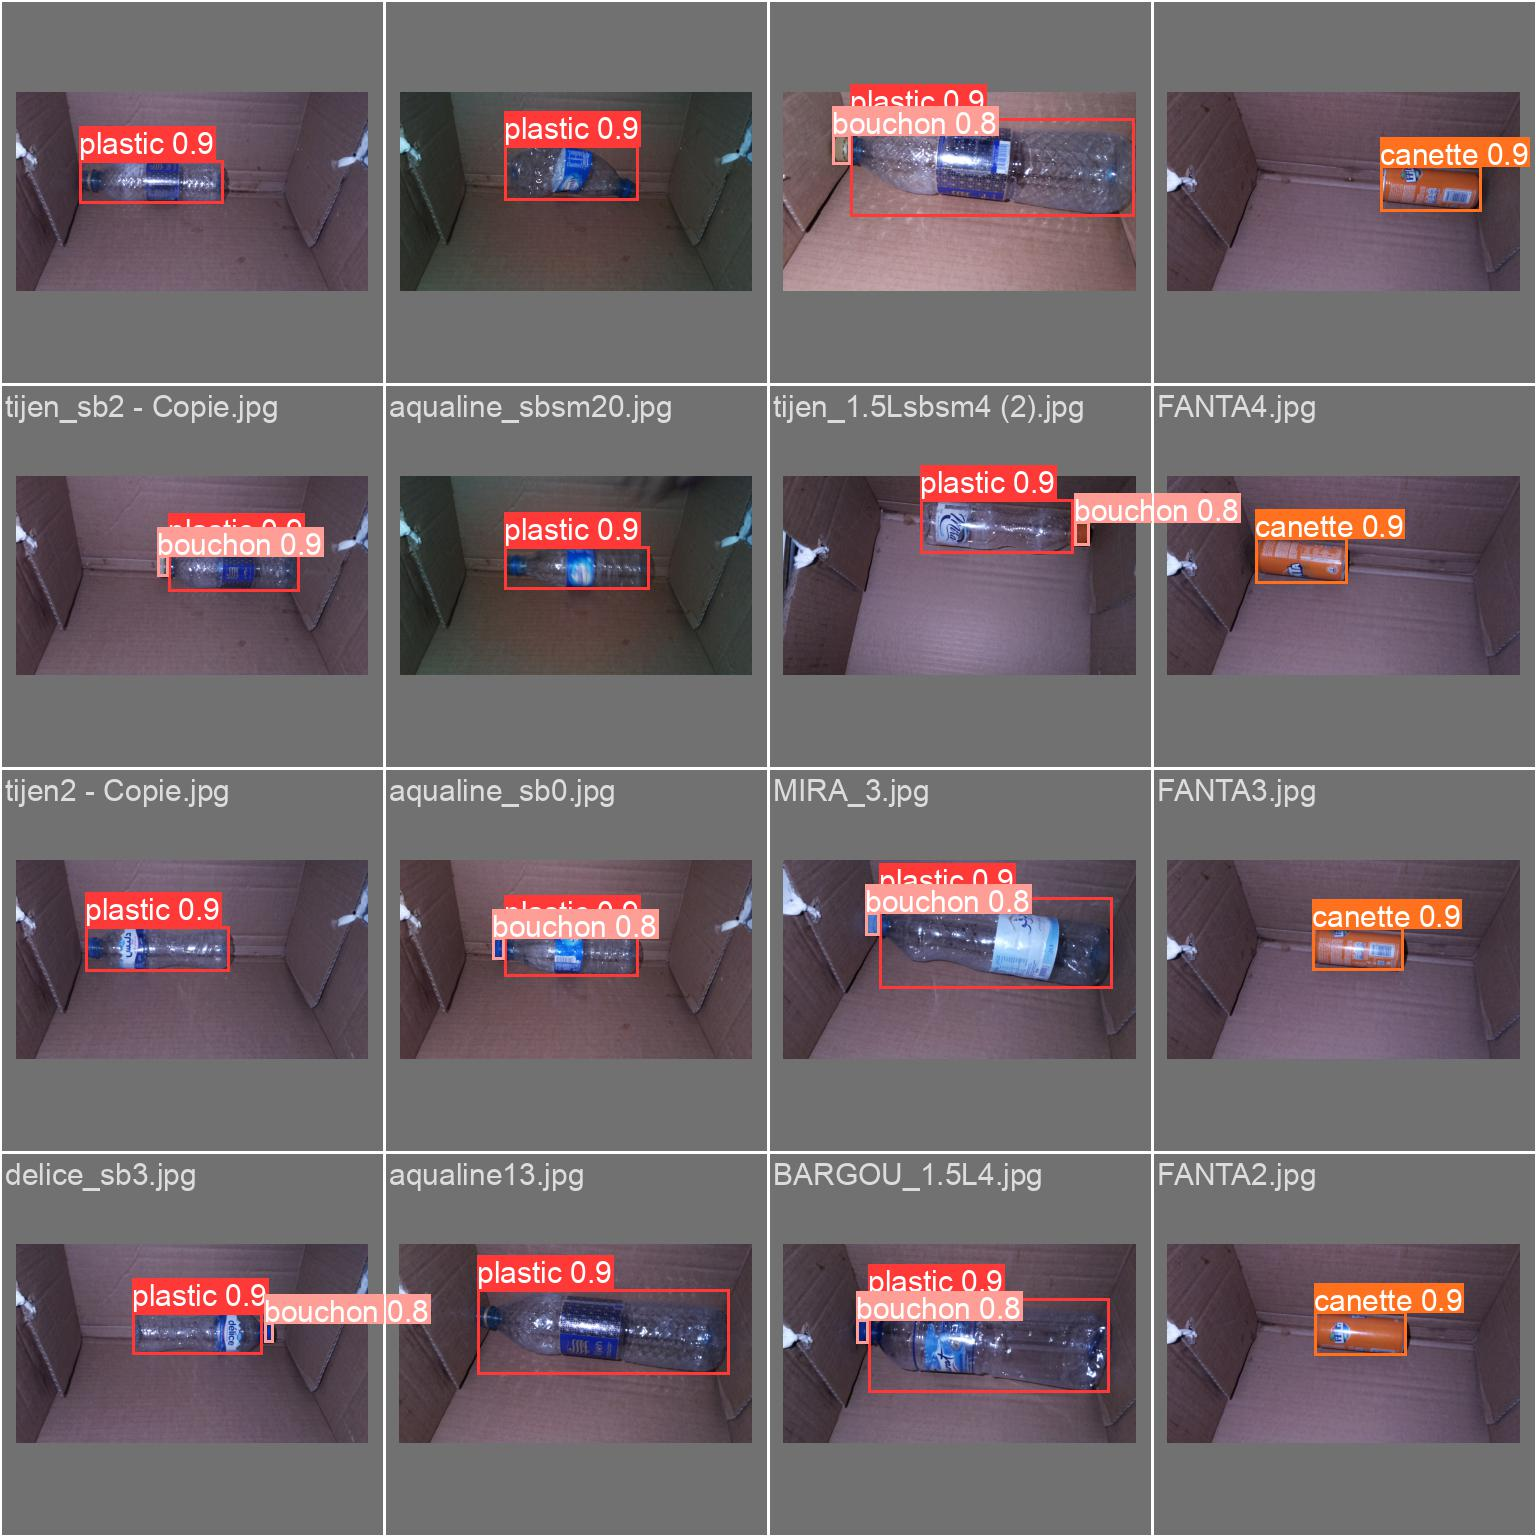

In [ ]:
Image(filename='/content/drive/MyDrive/rvm_object_detection/runs/detect/train9/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/rvm_object_detection/runs/detect/train9/weights/best.pt conf=0.25  source=obj_detection/test/images

2023-04-17 23:20:26.189020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 23:20:27.086429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/24 /content/drive/MyDrive/rvm_object_detection/obj_detection/test/images/BARGOU_1.5L4.jpg: 224x352 1 plastic, 1 bouchon, 85.2ms
image 2/24 /content/drive/MyDrive/rvm_object_detection/obj_detection/test/images/BARGOU_1.5LSBSM4.jpg: 224x352 1 plastic, 9.4ms
image 3/24 /content/drive/MyDrive/rvm_object_detection/obj_detection/test/images/BOGA_1.5LSB0.jpg: 224x352 1 plastic, 7.7ms
image 4/2

In [ ]:
import torch

# Load the PyTorch model
model = torch.load("/content/drive/MyDrive/rvm_object_detection/runs/detect/train9/weights/best.pt", map_location=torch.device('cpu'))

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/rvm_object_detection/runs/detect/train9/weights/best.pt conf=0.25  source="/content/drive/MyDrive/rvm_object_detection/obj_detection/test/images/BARGOU_1.5L4.jpg"

2023-04-17 23:24:15.611529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 23:24:16.494541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/drive/MyDrive/rvm_object_detection/obj_detection/test/images/BARGOU_1.5L4.jpg: 224x352 1 plastic, 1 bouchon, 62.3ms
Speed: 0.6ms pre-process, 62.3ms inference, 96.3ms postprocess per image at shape (1, 3, 352, 352)


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the saved model
model = torch.load('/content/drive/MyDrive/rvm_object_detection/runs/detect/train9/weights/best.pt')

# Set the model to evaluation mode
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the image
image_path = 'image.jpg'  # Replace
image = Image.open(image_path)

# Apply the transformations to the image
image_tensor = transform(image)

# Add a batch dimension to the tensor
image_tensor = image_tensor.unsqueeze(0)

# Make predictions on the input data
with torch.no_grad():
    output = model(image_tensor)

# Print the output
print(output)

AttributeError: ignored